In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
result = next(os.walk("D:\\Data Science\\Fraud_Detection\data"))
print(result)

('D:\\Data Science\\Fraud_Detection\\data', [], ['sample_submission.csv', 'test_identity.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv'])


In [4]:
X_train = pd.read_csv(".\\data\\train_transaction.csv")

In [5]:
Y_train = pd.read_csv(".\\data\\train_identity.csv")

# 觀察訓練資料

Kaggle Description:
Categorical Features - Transaction
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

- 訓練資料中，共有394個欄位，其中376為float；4個為int；14個為object
- 資料筆數共有590,540筆。

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


由下可以看到資料欄位與Kaggle敘述有落差，但看起來都是相同的欄位樣式，先觀察前17筆欄位。

In [13]:
X_train.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

找到這邊有更詳細的欄位說明
https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

In [14]:
# 前17筆欄位
# ProductCD 產品交易序號
# card為卡片的一些資訊，像card type, card category, issue bank, country，注意裡面有NA
X_train.iloc[0:5, 0:17]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN


In [16]:
# C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
X_train.iloc[0:5, 17:31]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [17]:
# D1-D15: timedelta, such as days between previous transaction, etc.
X_train.iloc[0:5, 31:46]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# M1-M9: match, such as names on card and address, etc
X_train.iloc[0:5, 46:55]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
X_train.iloc[0:5, 55:394]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 看一下整體訴求
https://www.kaggle.com/c/ieee-fraud-detection/overview/description

# Vesta 公司 : https://trustvesta.com

## 目標：
以往為了建立詐欺系統，會盡可能保護使用者，但是卻會出現一些尷尬的情況，比如你想花費100,000買蛋糕，這時會啟動防禦系統，但這也會讓消費者感到尷尬。所以想要讓防禦系統能夠讓使用者更加便利。

Y_train裡面的資料比數有144,233筆，明顯與訓練資料無法完全對應，這點Kaggle有提到。
此外，欄位有41欄，裡面幾乎都是以ID命名。

In [20]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [5]:
Y_train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


# Data Process
## 先盡量了解training data 有哪些有用的資訊，並且對NA值做清理

In [9]:
X_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_train.iloc[:, 0:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 22.5+ MB


         TransactionID  TransactionDT  TransactionAmt  ProductCD
isFraud                                                         
0               569877         569877          569877     569877
1                20663          20663           20663      20663


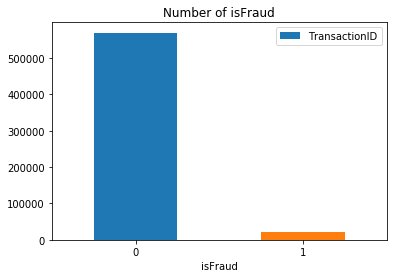

In [17]:
df = X_train.iloc[:, 0:5].groupby("isFraud").count()
print(df)
ax = df.plot.bar(x=df.index, y='TransactionID', rot=0, title="Number of isFraud")

In [33]:
X_train.iloc[:, 0:5][X_train.ProductCD=="C"].groupby(["ProductCD", "isFraud"]).size().index.tolist()

[('C', 0), ('C', 1)]

# 由下圖可以知道，productCD中，大部分都是W。

ProductCD
C     68519
H     33024
R     37699
S     11628
W    439670
dtype: int64
----------------------------------------


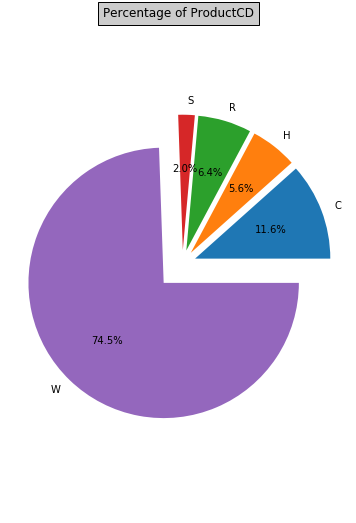

In [41]:
# 將productCD做敘述統計
print(X_train.iloc[:, 0:5].groupby("ProductCD").size())
print("-"*40)

plt.figure(figsize=(6,9))
separated = (0.1, 0.1, 0.1, 0.1, 0.2)
size = X_train.iloc[:, 0:5].groupby("ProductCD").size().values.tolist()
label = X_train.iloc[:, 0:5].groupby("ProductCD").size().index.tolist()
plt.pie(size, labels=label, autopct="%1.1f%%", 
        explode=separated)
plt.axis("equal")
plt.title("Percentage of ProductCD", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# 由下圖可以知道，productCD中，C的詐欺率最高，W反到是最低。。

----------------------------------------
ProductCD  isFraud
C          0           60511
           1            8008
H          0           31450
           1            1574
R          0           36273
           1            1426
S          0           10942
           1             686
W          0          430701
           1            8969
dtype: int64
----------------------------------------


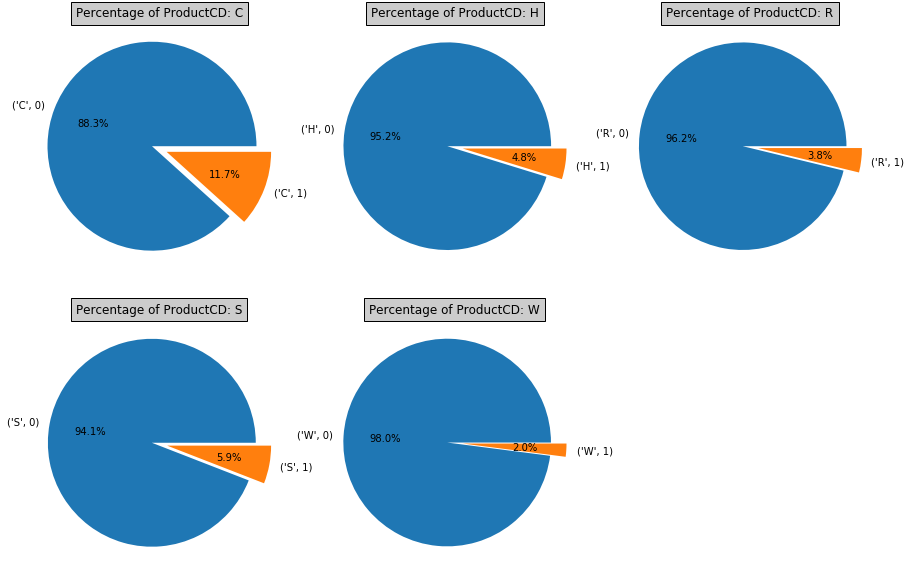

In [42]:
print("-"*40)
print(X_train.iloc[:, 0:5].groupby(["ProductCD", "isFraud"]).size())
print("-"*40)

# 將productCD個別看比例
label = X_train.iloc[:, 0:5].groupby("ProductCD").size().index.tolist()
plt.figure(figsize=(15,10))
c = 1
for i in label:
    plt.subplot(2,3,c)
    separated = (0, 0.15)
    size = X_train.iloc[:, 0:5][X_train.ProductCD==i].groupby(["ProductCD", "isFraud"]).size().values.tolist()
    labels = X_train.iloc[:, 0:5][X_train.ProductCD==i].groupby(["ProductCD", "isFraud"]).size().index.tolist()
    plt.pie(size, labels=labels, autopct="%1.1f%%", 
            explode=separated)
    plt.axis("equal")
    plt.title("Percentage of ProductCD: " + i, bbox={'facecolor':'0.8', 'pad':5})
    c+=1
plt.show()